<a href="https://colab.research.google.com/github/Krishnagoparaju/ML-project/blob/main/Credit_Card_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier



In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Importing the dataset

In [3]:
dataset = pd.read_csv('UCI_Credit_Card.csv')
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [4]:
print(X)

[[1.0000e+00 2.0000e+04 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0000e+00 1.2000e+05 2.0000e+00 ... 1.0000e+03 0.0000e+00 2.0000e+03]
 [3.0000e+00 9.0000e+04 2.0000e+00 ... 1.0000e+03 1.0000e+03 5.0000e+03]
 ...
 [2.9998e+04 3.0000e+04 1.0000e+00 ... 4.2000e+03 2.0000e+03 3.1000e+03]
 [2.9999e+04 8.0000e+04 1.0000e+00 ... 1.9260e+03 5.2964e+04 1.8040e+03]
 [3.0000e+04 5.0000e+04 1.0000e+00 ... 1.0000e+03 1.0000e+03 1.0000e+03]]


In [5]:
print(y)

[1 1 0 ... 1 1 1]


Data Preprocessing

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Droping 'ID' column

In [8]:
dataset.drop(["ID"], axis=1, inplace= True)

In [9]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

Dropping Repeated Catogories

In [10]:
cl=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in cl:
    print (i,dataset[i].unique())

SEX [2 1]
EDUCATION [2 1 3 5 4 6 0]
MARRIAGE [1 2 3 0]
PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 [-2  2  0 -1  3  6  4  7  8  5]


In [11]:
dataset['EDUCATION'].replace({0:4,5:4,6:4}, inplace=True)
dataset.EDUCATION.value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
4,468


In [12]:
dataset['MARRIAGE'].replace({0:3}, inplace=True)
dataset.MARRIAGE.value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,377


Data Visualization

Target Variable

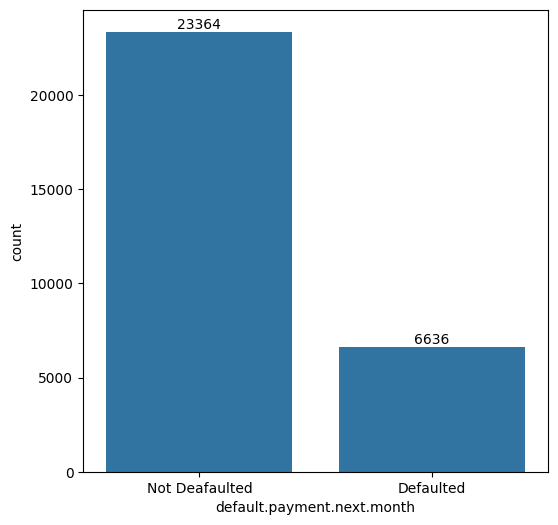

In [13]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x= dataset['default.payment.next.month'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.show()

SEX Variable

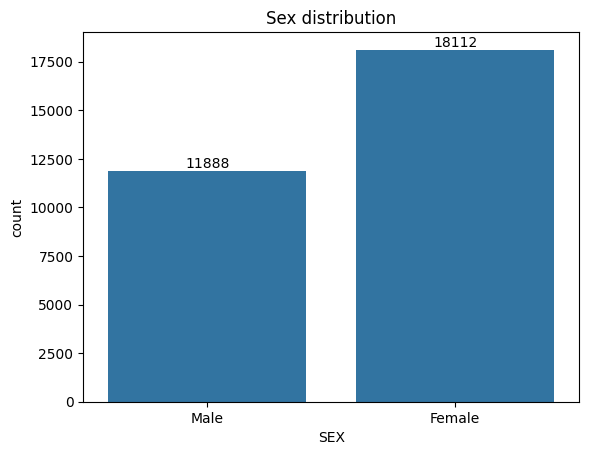

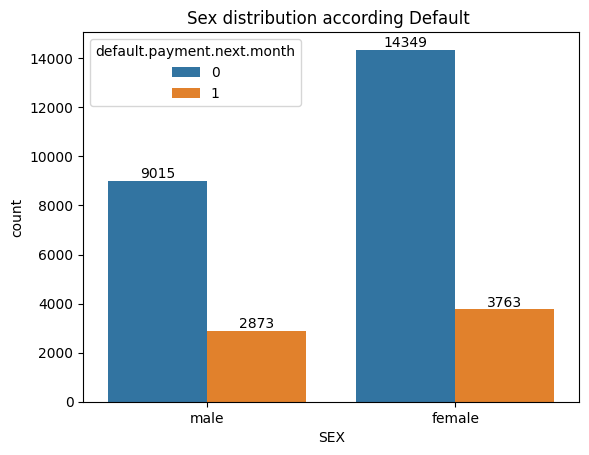

In [14]:
ax=sns.countplot(x= dataset['SEX'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Male", "Female"])
plt.title("Sex distribution")
plt.show()

ax=sns.countplot(data=dataset, x="SEX", hue="default.payment.next.month")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["male", "female"])
plt.title("Sex distribution according Default ")
plt.show()

Education Variable

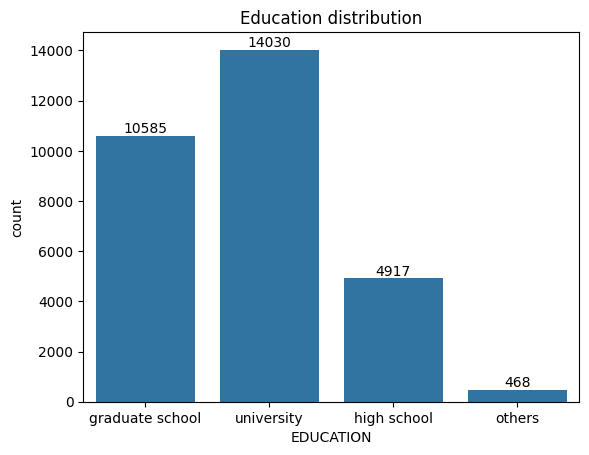

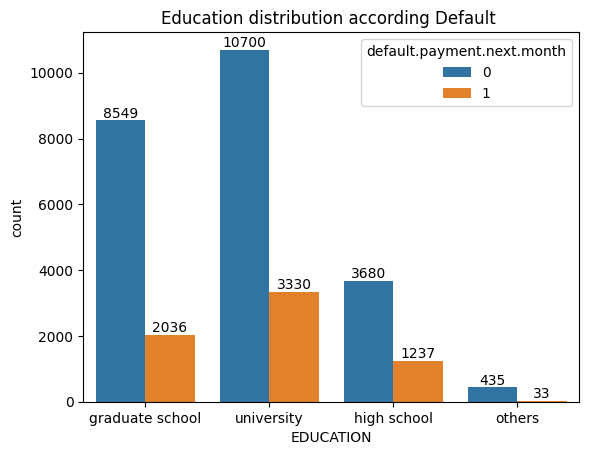

In [15]:
ax=sns.countplot(x= dataset['EDUCATION'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution")
plt.show()

ax=sns.countplot(data=dataset, x="EDUCATION", hue="default.payment.next.month")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution according Default ")
plt.show()

Marriage Variable

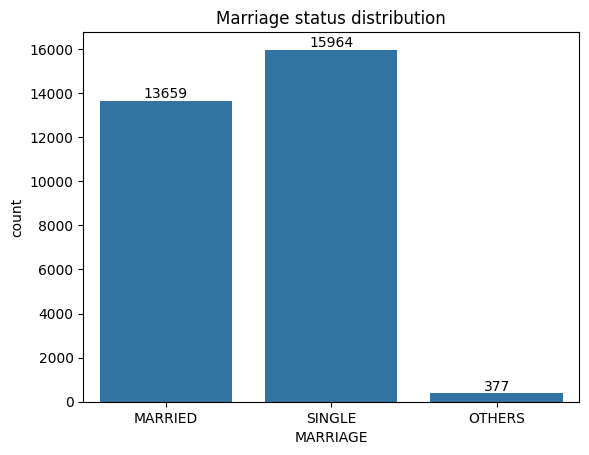

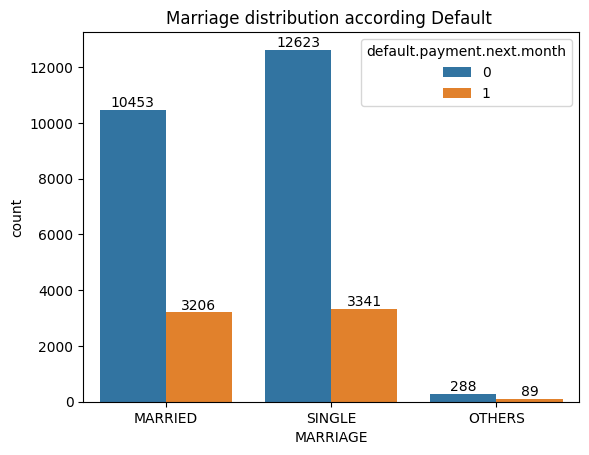

In [16]:
ax=sns.countplot(x= dataset['MARRIAGE'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage status distribution")
plt.show()

ax=sns.countplot(data=dataset, x="MARRIAGE", hue="default.payment.next.month")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage distribution according Default ")
plt.show()

Age Variable

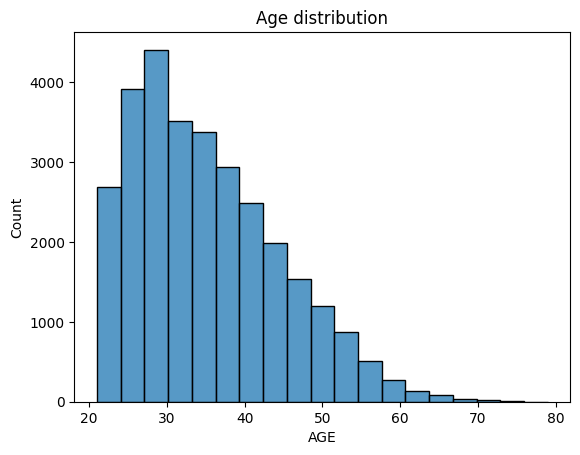

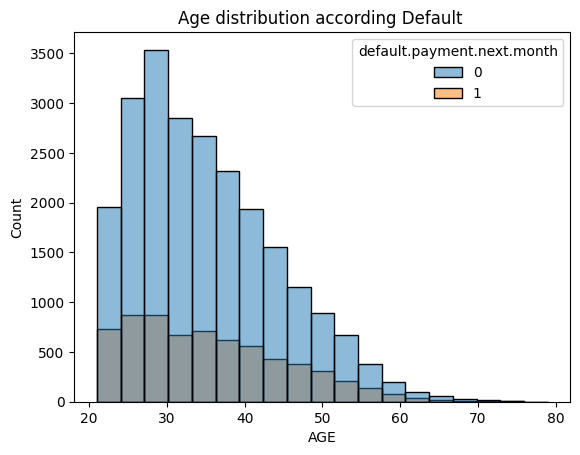

In [17]:
sns.histplot(data=dataset, x="AGE",binwidth=3)
plt.title("Age distribution")
plt.show()

sns.histplot(data=dataset, x="AGE", hue="default.payment.next.month", binwidth=3)
plt.title("Age distribution according Default ")
plt.show()

MODELS


Feature Scaling

In [18]:
scaler= StandardScaler()
X= scaler.fit_transform(X)

Spilliting the dataset into train and test sets

In [19]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=1)

Balancing the Data

In [20]:
print("Before oversampling: ",Counter(y_train))
SMOTE= SMOTE()


X_train,y_train= SMOTE.fit_resample(X_train,y_train)


print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18701, 1: 5299})
After oversampling:  Counter({1: 18701, 0: 18701})


Linear Regression


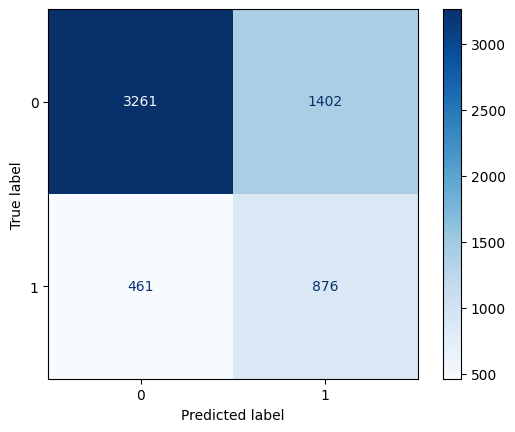

In [21]:


logit= LogisticRegression()
logit.fit(X_train, y_train)

y_pred= logit.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

Evaluation metrics for linear Regression

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , accuracy_score , classification_report

print("Logit model's accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Logit model's accuracy: 0.6895
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      4663
           1       0.38      0.66      0.48      1337

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.71      6000

Mean Absolute Error: 0.3105
Mean Squared Error: 0.3105
Root Mean Squared Error: 0.5572252686302013
R-squared: -0.7929463009535271


Decision Tress Classifier


Decision Tree Accuracy : 0.7595
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4663
           1       0.46      0.50      0.48      1337

    accuracy                           0.76      6000
   macro avg       0.66      0.67      0.66      6000
weighted avg       0.77      0.76      0.76      6000

confusion matrix of decision tree


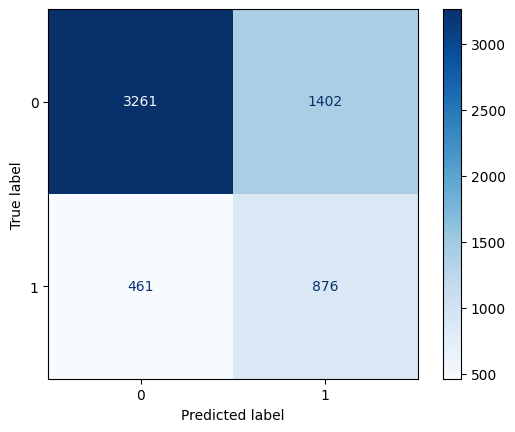

In [23]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7,
                                     max_features= 9, min_samples_leaf= 2,
                                     random_state=0)
Tree.fit(X_train, y_train)
pred_tree = Tree.predict(X_test)
print('Decision Tree Accuracy :', accuracy_score(y_test,pred_tree))

print(classification_report(y_test, pred_tree))

print('confusion matrix of decision tree')
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

Random Forest

Random Forest Accuracy is: 0.8016666666666666
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4663
           1       0.57      0.45      0.50      1337

    accuracy                           0.80      6000
   macro avg       0.71      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000



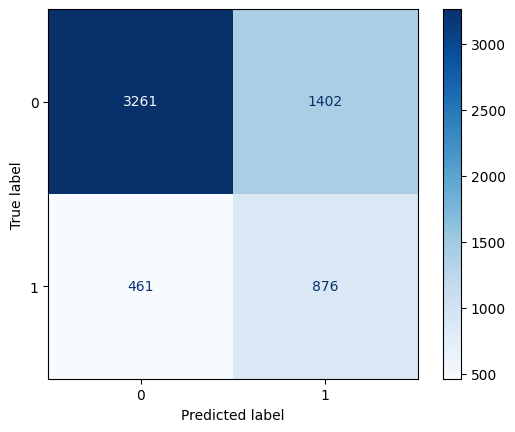

In [24]:
rf= RandomForestClassifier()

rf.fit(X_train,y_train)

pred_rf= rf.predict(X_test)

print("Random Forest Accuracy is:", accuracy_score(y_test, pred_rf))

print(classification_report(y_test,pred_rf ))
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)




XGBoost

XGBoost Accuracy: 0.8063333333333333
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4663
           1       0.60      0.40      0.48      1337

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



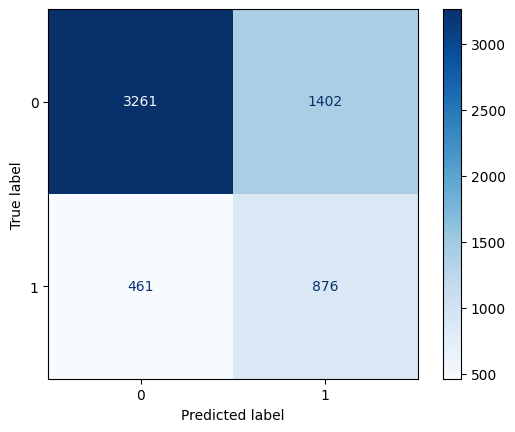

In [25]:
xgboost= xgb.XGBClassifier()


xgboost.fit(X_train,y_train)

xgboost_pred= xgboost.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgboost_pred))
print(classification_report(y_test,xgboost_pred ))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)


Hyperparamter Tuning


In [26]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [27]:
random_search=RandomizedSearchCV(xgboost,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [28]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
classifier=XGBClassifier(objective='binary:logistic',
                                  min_child_weight=3,
                                 max_depth=10,
                                 learning_rate=0.25,
                                 gamma=0.1,
                                  colsample_bynode=1,
                                  colsample_bytree=0.4,
                                  use_label_encoder=False)

# Fitting the model
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=1, colsample_bytree=0.4,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.25, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Predicting Model

In [30]:
hyper_pred= classifier.predict(X_test)

print("The accuracy of the model is:", accuracy_score(y_test, hyper_pred))

The accuracy of the model is: 0.798


Comparing Model Performances

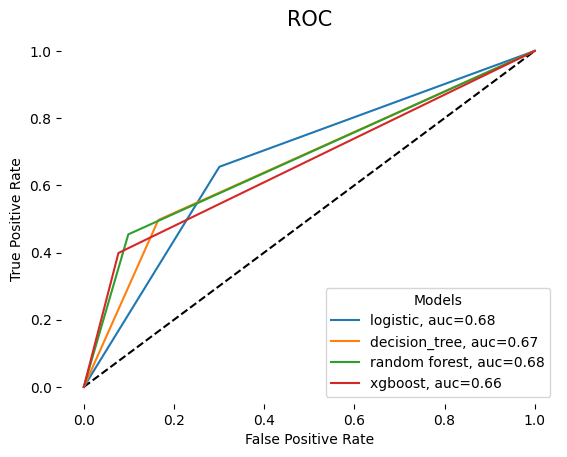

In [31]:
from sklearn import metrics

pred_logit= logit.predict(X_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test,  pred_logit)
auc1 = metrics.roc_auc_score(y_test, pred_logit)

# decision tree model:
pred_tree = Tree.predict(X_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test,  pred_tree)
auc2 = metrics.roc_auc_score(y_test, pred_tree)

# random forest model:
pred_rf= rf.predict(X_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test,  pred_rf)
auc3 = metrics.roc_auc_score(y_test, pred_rf)

# XGboost:
xgboost_pred= xgboost.predict(X_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test,  xgboost_pred)
auc4 = metrics.roc_auc_score(y_test, xgboost_pred)


plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="logistic, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="decision_tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="random forest, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="xgboost, auc="+str(round(auc4,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.show()

In [32]:
data = {'logistic':68.08,
                'decision_tree':72.83,
               'randome_forest': 79.35,
                'xgboost': 81.35,
               'xgboost_hyper':80.58}
courses = list(data.keys())
values = list(data.values())

([0, 1, 2, 3, 4],
 [Text(0, 0, 'logistic'),
  Text(1, 0, 'decision_tree'),
  Text(2, 0, 'randome_forest'),
  Text(3, 0, 'xgboost'),
  Text(4, 0, 'xgboost_hyper')])

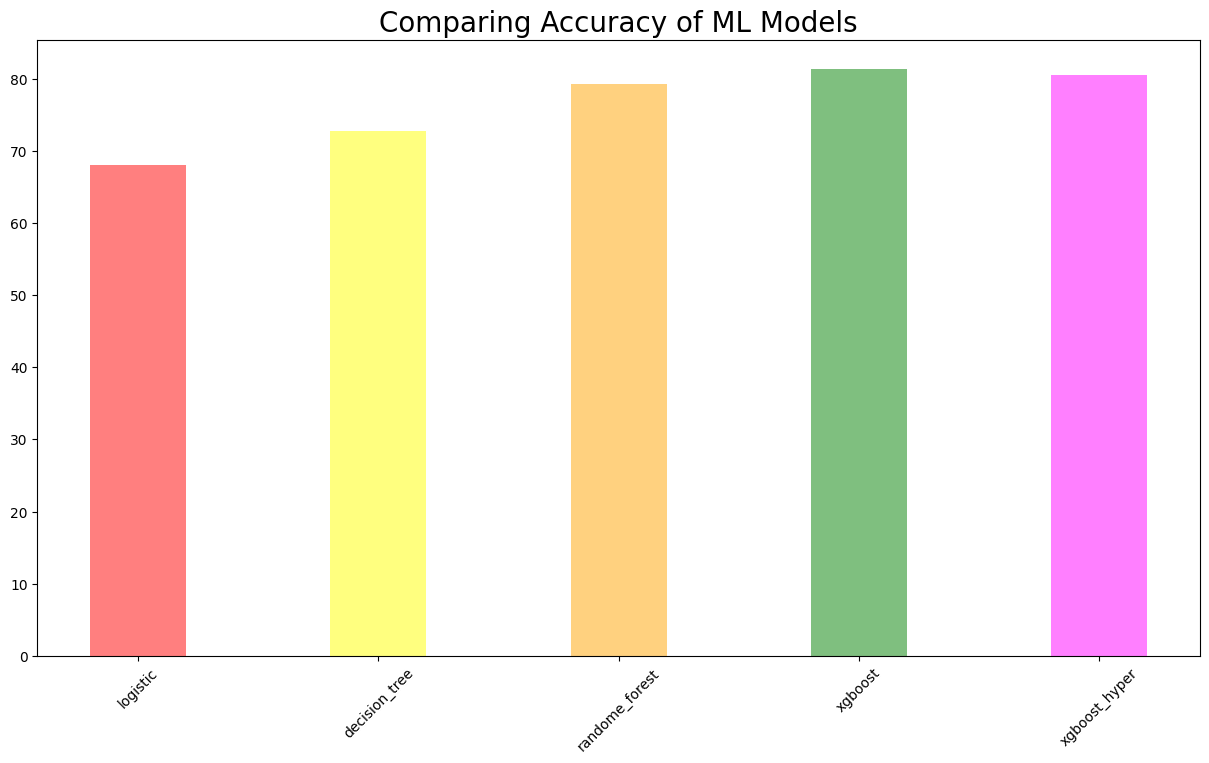

In [33]:
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange','green','magenta'
    ]
plt.bar(courses, values, color =colors,alpha=0.5,width = 0.4)
plt.xticks(rotation = 45)